# Lead Score Case Study

### Problem Statement

- An education company named X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted.

- X Education wants it's Data Analyst team to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.

- The company requires its Data Analyst team to build a model wherein they need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

In [168]:
#supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [169]:
# import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [170]:
### Load the dataset
lead_score = pd.read_csv(r"C:\Users\User\Desktop\Batch-1\leadscore case study/Leads.csv")

In [171]:
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [172]:
## check columns
lead_score.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [173]:
lead_score.shape

(9240, 37)

In [174]:
### It is important to know the original conversion rate of the company before we proceed. Let us calculate that
originalConversionRate = round((sum(lead_score['Converted'])/len(lead_score['Converted'].index))*100, 2)
print("The conversion rate of leads is: ",originalConversionRate)

The conversion rate of leads is:  38.54


### Obseravation
We notice that the original conversion rate of company X is 38.54%.

# 1. Data Analysis and EDA

We will carry out some exploratory data analysis and understand the data better. 

#### Steps taken:

- Checking the shape, columns, datatypes etc. of the dataset
- Assessing out of place values
- Checking for duplicate values
- Checking for null values
- Dropping unnecessary columns

After this basic analysis we will carry out analysis of columns on individual basis and make a decision based on: 
- Impute values in rows with less than 5 values missing
- Perform univariate, bivariate and multivariate analysis on various columns

Once our data is prepared and free of any anomalies we will

- Create dummies for our remaining columns


In [175]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [176]:
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Observation

- The shape of the dataset is 9240x37
- We see a large number of 'Select' values present in various columns in the dataset. These values correspond to the user having not made any selection.
- There are 7 numerical columns and 30 categorical columns

#### We will now assess the data and convert any 'Select' values into NAN values so that they can be treated as null values.

In [177]:
lead_score = lead_score.replace('Select', np.nan)
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [178]:
### Dropping rows with duplicate values based on unique 'Prospect ID' & for 'Lead Number' for each candidate
print('Are there NO duplicates present in Prospect Id column? ', sum(lead_score.duplicated('Prospect ID')) == 0)
print('Are there NO duplicates present in Lead Number Column? ', sum(lead_score.duplicated('Lead Number')) == 0)

Are there NO duplicates present in Prospect Id column?  True
Are there NO duplicates present in Lead Number Column?  True


In [179]:
lead_score.shape

(9240, 37)

In [180]:
round(100*(lead_score.isnull().sum()/lead_score.shape[0]),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Removing columns having more than 43% null values

In [181]:
lead_score.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [182]:
round(100*(lead_score.isnull().sum()/lead_score.shape[0]),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Remove column Tags as it is assigned to customers after contacting by the sales team

In [183]:
lead_score.drop('Tags',axis=1,inplace=True)

In [184]:
round(100*(lead_score.isnull().sum()/lead_score.shape[0]),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Now let's inspect categorical values

In [185]:
lead_score.shape

(9240, 29)

## EDA

In [186]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
Converted = (sum(lead_score['Converted'])/len(lead_score['Converted'].index))*100
Converted

38.53896103896104

In [187]:
lead1 = lead_score[lead_score['Converted']==1]

In [188]:
lead0 = lead_score[lead_score['Converted']==0]

In [189]:
eda_col = ['Lead Origin', 'Lead Source','Last Activity', 'Specialization', 'What is your current occupation',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity']

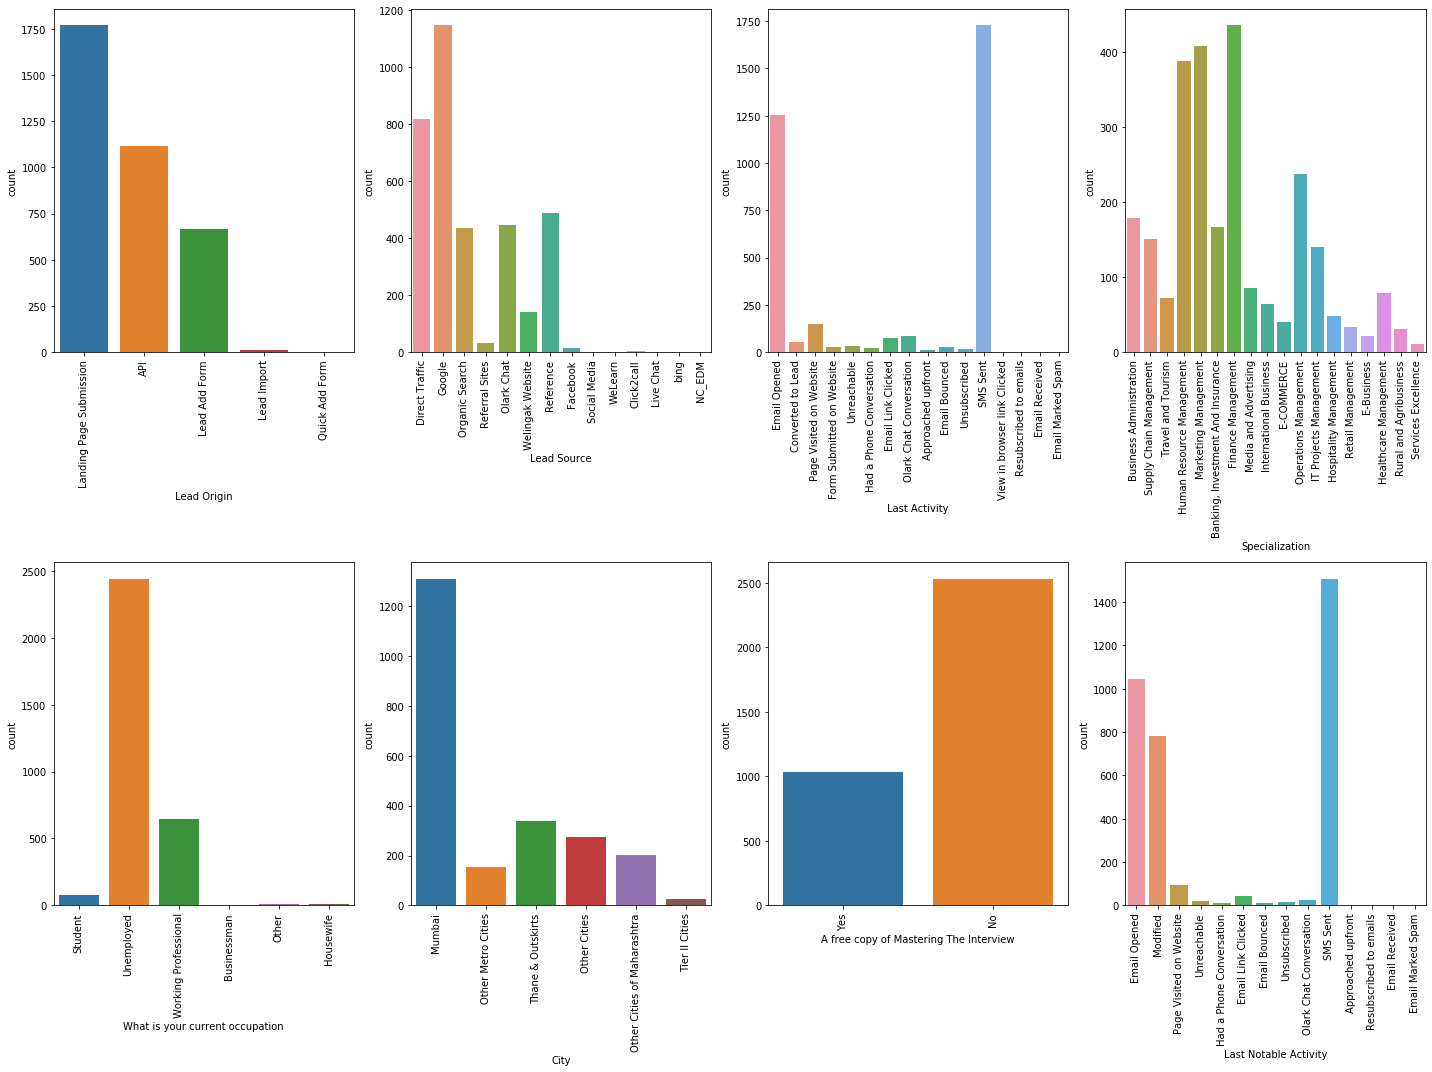

In [190]:
plt.figure(figsize=(20,15))
for i in enumerate(eda_col):
    plt.subplot(2,4,i[0]+1)
    ax = sns.countplot(x=i[1],data=lead1)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

    
plt.tight_layout()
plt.show()

#### Facts about Them Whose leads are getting converted 
1. Leads origiated from website landing page submission
2. Lead sourced from google
3. Last activity done by the user is sent sms same for last notable activity also
4. Users are generally filling the form for 'Finance Management'
5. Unemployed are mainly interested about x education company
6. User belongs to mumbai 
7. Those whose leads are converted are not interested about free copy of mastering the interview.

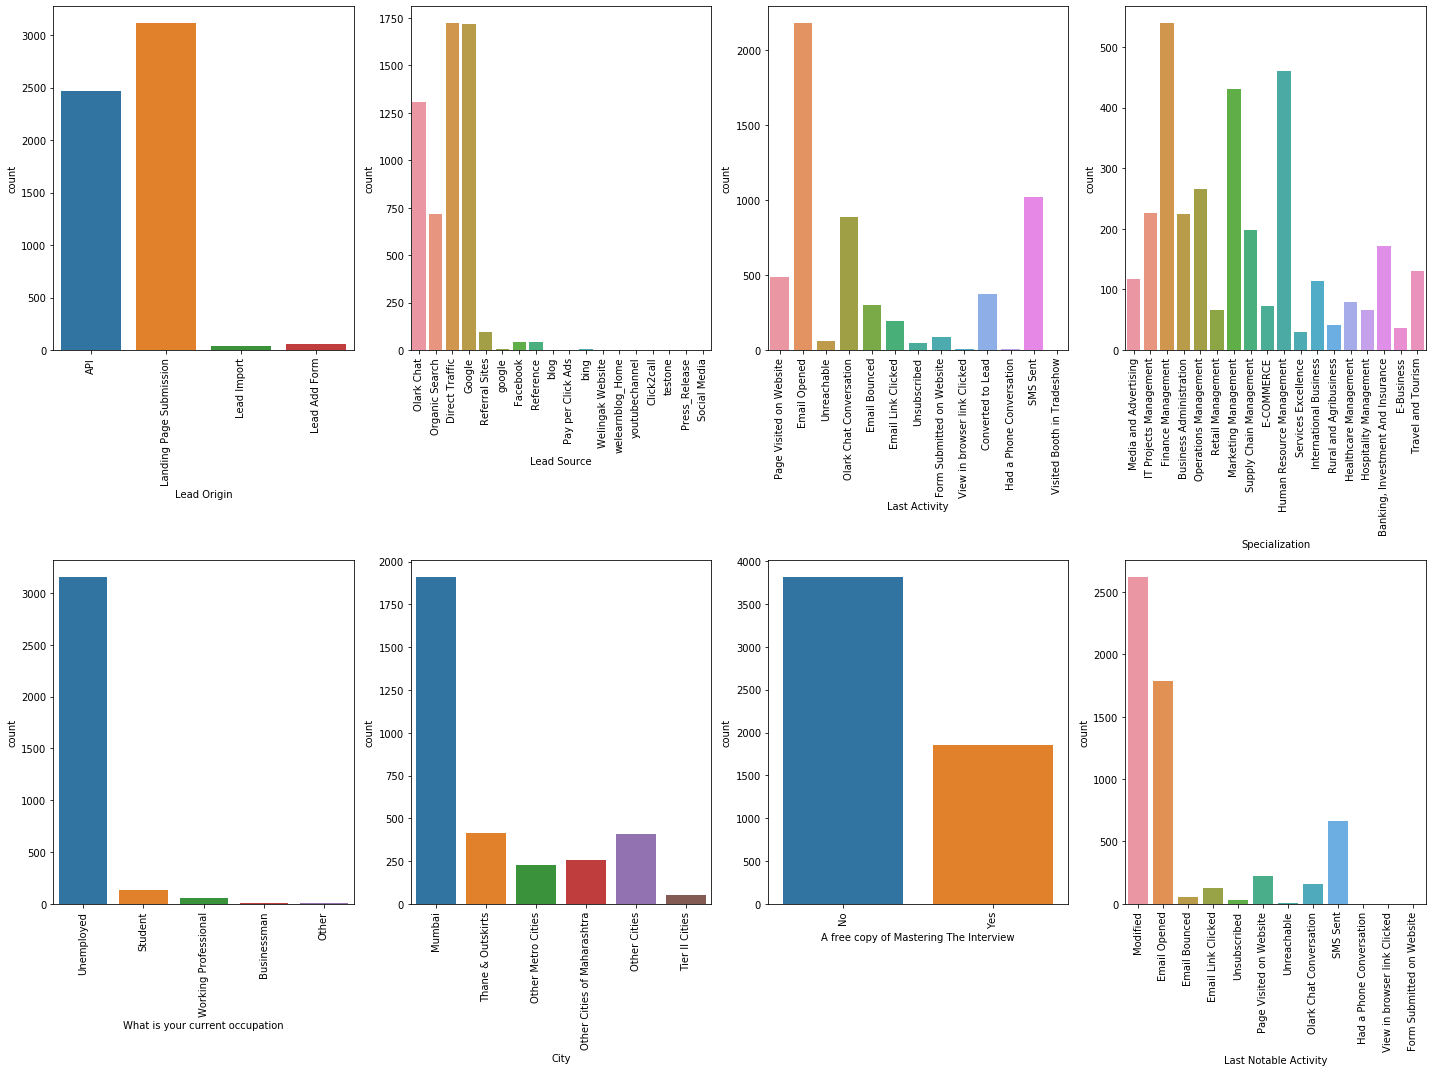

In [191]:
plt.figure(figsize=(20,15))
for i in enumerate(eda_col):
    plt.subplot(2,4,i[0]+1)
    ax = sns.countplot(x=i[1],data=lead0)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

    
plt.tight_layout()
plt.show()

#### Facts about Them Whose leads are not getting converted 
1. Leads origiated from website landing page submission
2. Lead sourced from Direct Traffic
3. Last activity done by the user is email opened and last notable activity is modified
4. Users are generally filling the form for 'Finance Management'
5. Unemployed are mainly interested about x education company
6. User belongs to mumbai 
7. Those whose leads are converted are not interested about free copy of mastering the interview.

In [192]:
lead_score.nunique(axis=0,dropna=True)

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

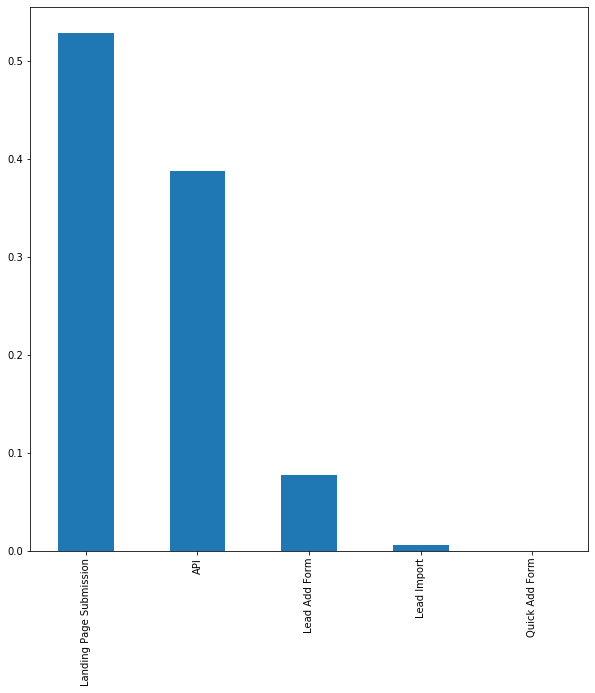

In [193]:
plt.figure(figsize=(10,10))
lead_score['Lead Origin'].value_counts(normalize=True).plot.bar()
plt.show()

#### Insight:
Maximum lead origins belongs from 'landing page submission' and 'api' hence converted other types of lead origins into 'other origins'

In [194]:
def combine(x):
    if x=='Lead Add Form' or x=='Lead Import' or x=='Quick Add Form':
        return ('Other Origins')
    else:
        return (x)

lead_score['Lead Origin'] = lead_score['Lead Origin'].apply(lambda x: combine(x))

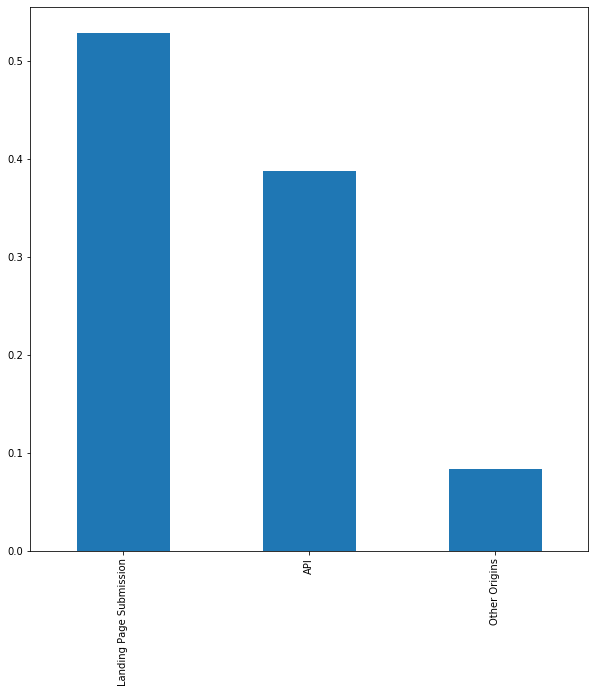

In [195]:
plt.figure(figsize=(10,10))
lead_score['Lead Origin'].value_counts(normalize=True).plot.bar()
plt.show()

#### Insight


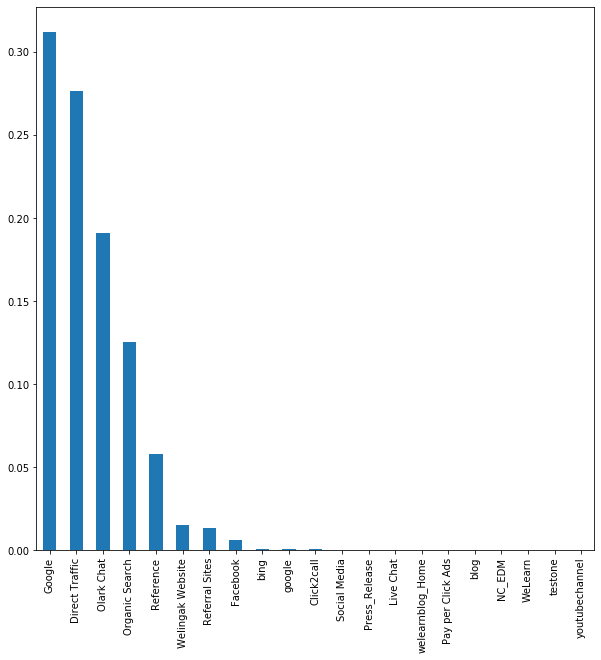

In [196]:
plt.figure(figsize=(10,10))
lead_score['Lead Source'].value_counts(normalize=True).plot.bar()
plt.show()

In [197]:
def combine_source(x):
    if x=='Google' or x=='Direct Traffic' or x=='Olark Chat':
        return (x)
    else:
        return ('Other Source')

lead_score['Lead Source'] = lead_score['Lead Source'].apply(lambda x: combine_source(x))

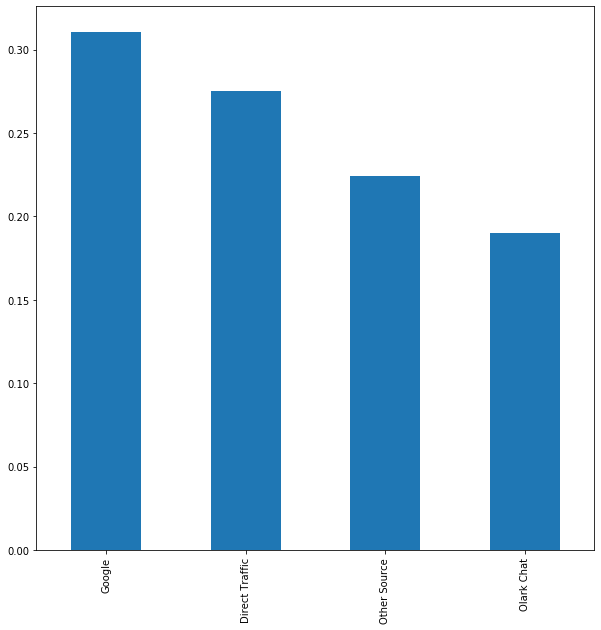

In [198]:
plt.figure(figsize=(10,10))
lead_score['Lead Source'].value_counts(normalize=True).plot.bar()
plt.show()

#### Insight:
Maximum Lead source belongs from Google , Direct Traffic and Olark Chat hence converted other type of sources into 'Other Source'

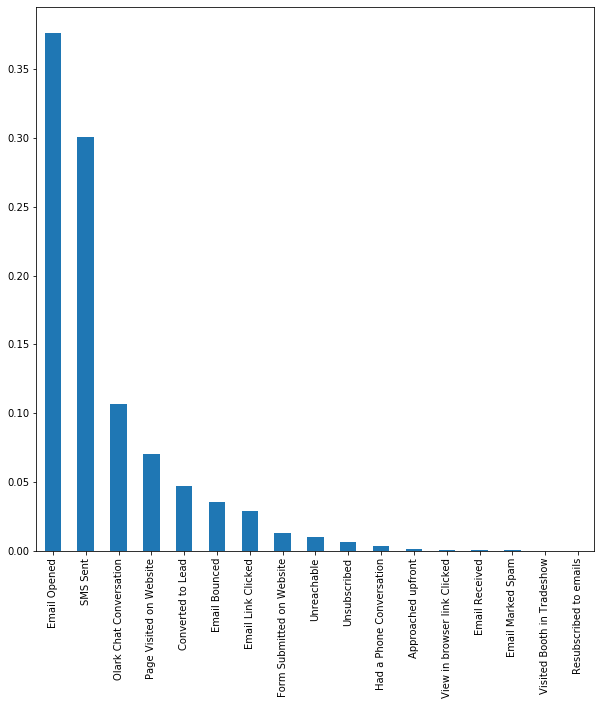

In [199]:
plt.figure(figsize=(10,10))
lead_score['Last Activity'].value_counts(normalize=True).plot.bar()
plt.show()

In [200]:
def combine_activity(x):
    if x=='SMS Sent' or x=='Email Opened':
        return (x)
    else:
        return ('Other Activity')

lead_score['Last Activity'] = lead_score['Last Activity'].apply(lambda x: combine_activity(x))

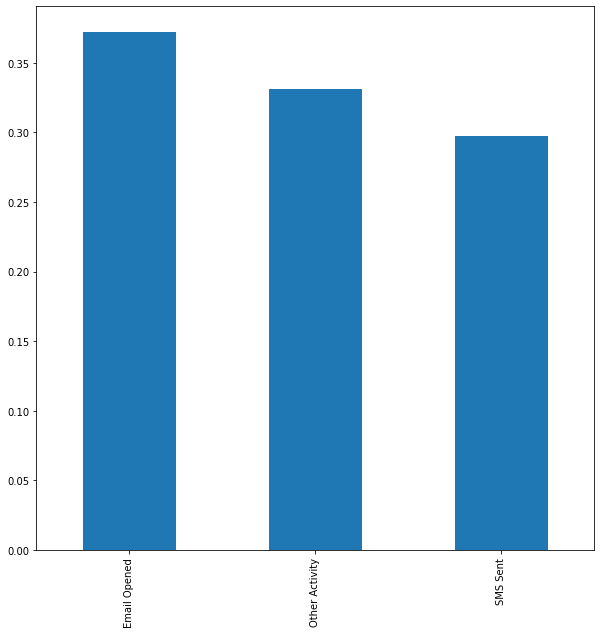

In [201]:
plt.figure(figsize=(10,10))
lead_score['Last Activity'].value_counts(normalize=True).plot.bar()
plt.show()

#### Insight:
Maximum last activity belongs to sms sent and email opened hence converted others into other activity

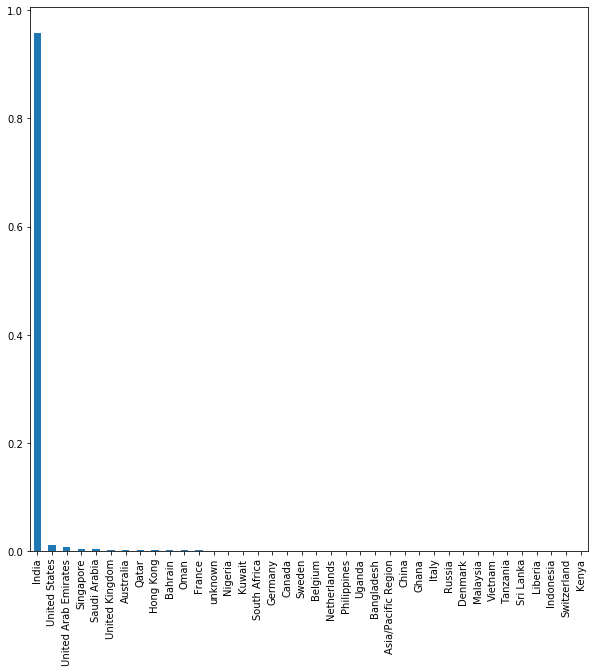

In [202]:
plt.figure(figsize=(10,10))
lead_score['Country'].value_counts(normalize=True).plot.bar()
plt.show()

#### Insight:
Data is highly skewed in Country column hence remove this column

In [203]:
lead_score.drop('Country',axis=1,inplace=True)

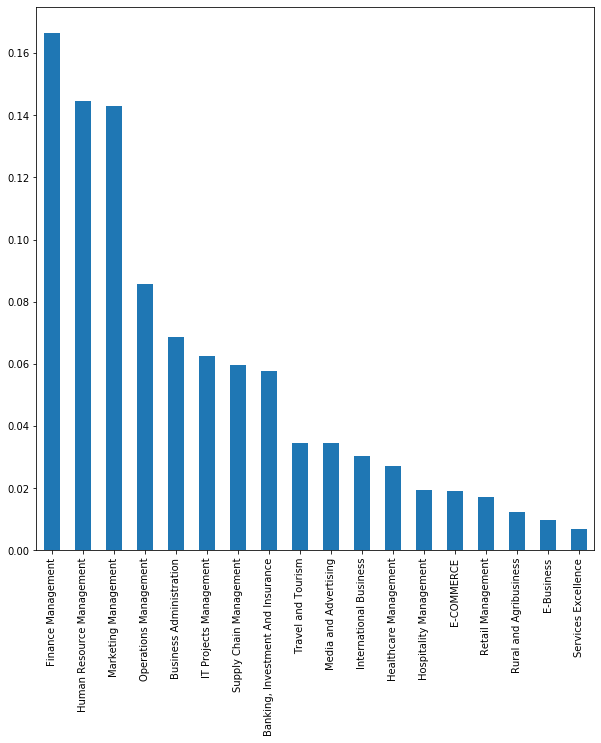

In [204]:
plt.figure(figsize=(10,10))
lead_score['Specialization'].value_counts(normalize=True).plot.bar()
plt.show()

#### Insight:
Mainly users are interested in Finance Management , Human Resource Management and Marketing Management . Hence make other categories in a separate category.

In [205]:
def combine_specilization(x):
    if x=='Finance Management' or x=='Human Resource Management'or x=='Marketing Management':
        return (x)
    else:
        return ('Other Specialization')

lead_score['Specialization'] = lead_score['Specialization'].apply(lambda x: combine_specilization(x))

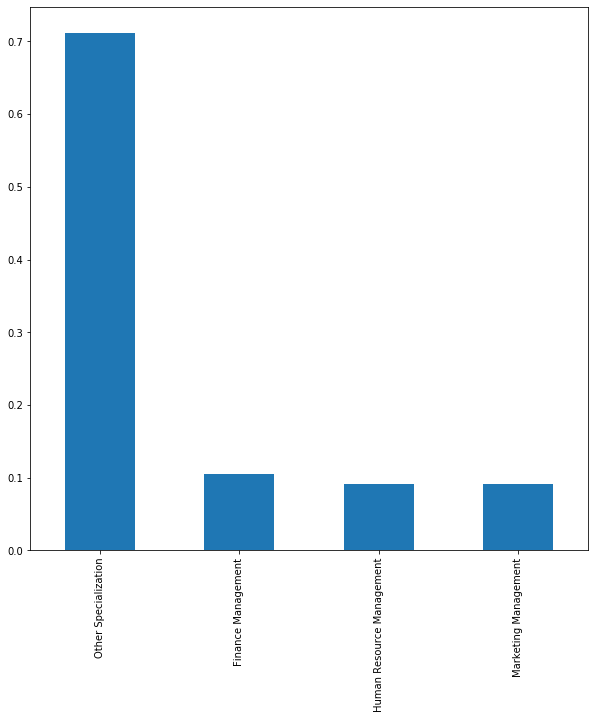

In [206]:
plt.figure(figsize=(10,10))
lead_score['Specialization'].value_counts(normalize=True).plot.bar()
plt.show()

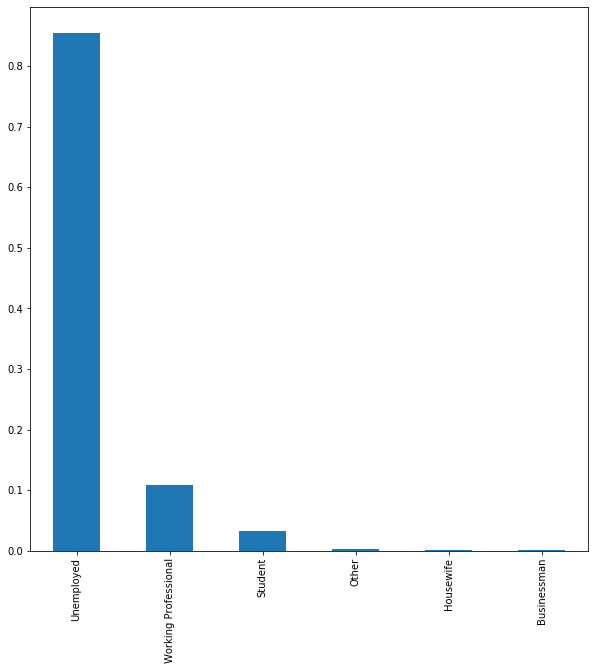

In [207]:
plt.figure(figsize=(10,10))
lead_score['What is your current occupation'].value_counts(normalize=True).plot.bar()
plt.show()

In [208]:
def combined_employed(x):
    if x=='Unemployed':
        return (x)
    else:
        return ('Others')

lead_score['What is your current occupation'] = lead_score['What is your current occupation'].apply(lambda x: combined_employed(x))

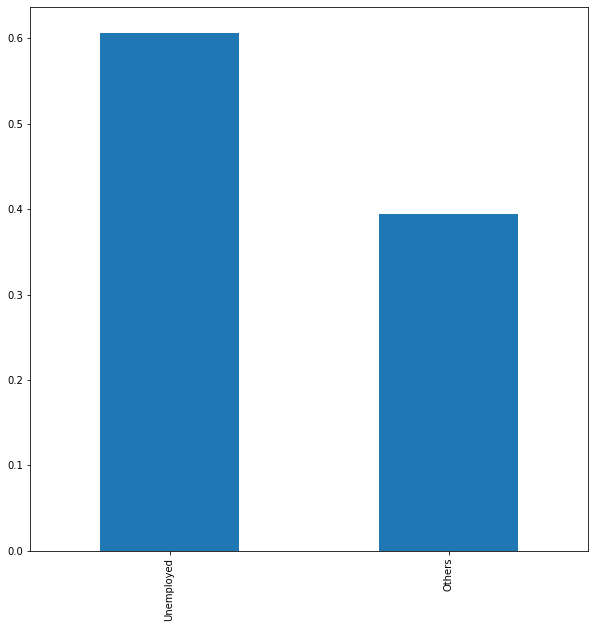

In [209]:
plt.figure(figsize=(10,10))
lead_score['What is your current occupation'].value_counts(normalize=True).plot.bar()
plt.show()

#### Insight:
Mainly there are two types of users unemployed and others

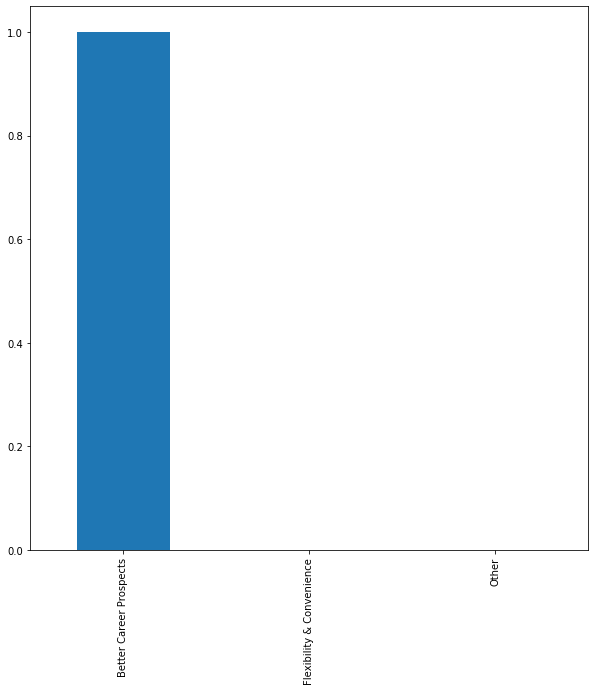

In [210]:
plt.figure(figsize=(10,10))
lead_score['What matters most to you in choosing a course'].value_counts(normalize=True).plot.bar()
plt.show()

#### Insight:
For maximum users better career prospects matters most hence it's skeweed and no need of this column

In [211]:
lead_score.drop('What matters most to you in choosing a course',axis=1,inplace=True)

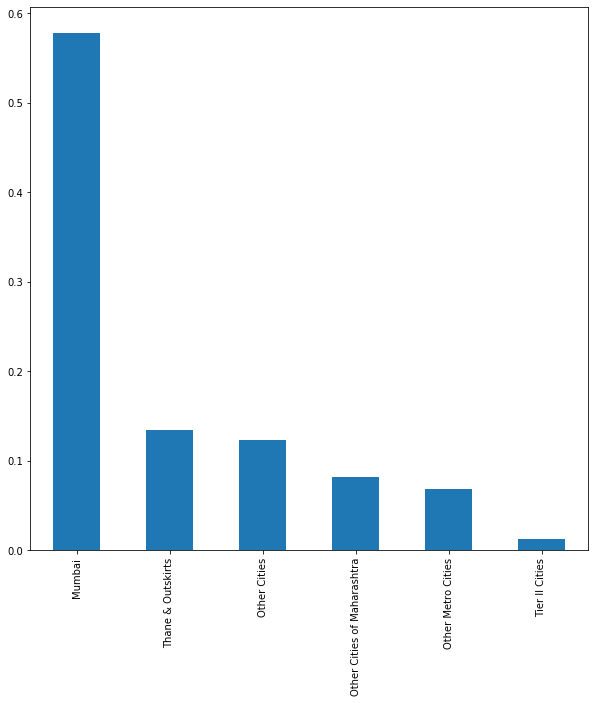

In [212]:
plt.figure(figsize=(10, 10))
lead_score['City'].value_counts(normalize=True).plot.bar()
plt.show()

In [213]:
def combine_cities(x):
    if x=='Mumbai':
        return (x)
    else:
        return ('Other City')

lead_score['City'] = lead_score['City'].apply(lambda x: combine_cities(x))

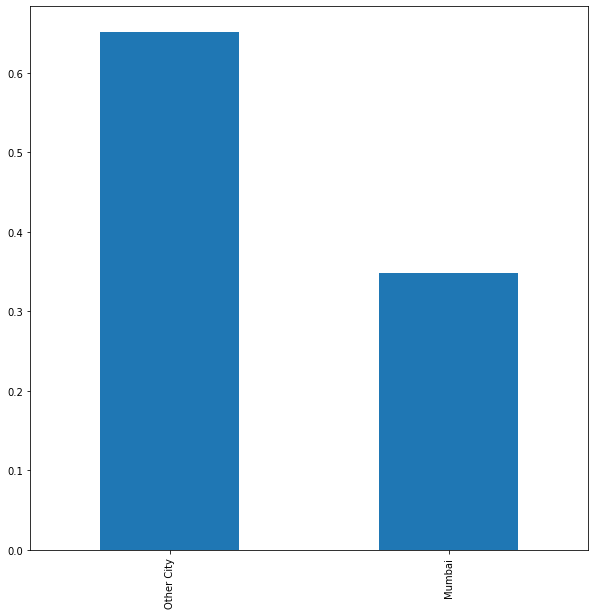

In [214]:
plt.figure(figsize=(10, 10))
lead_score['City'].value_counts(normalize=True).plot.bar()
plt.show()

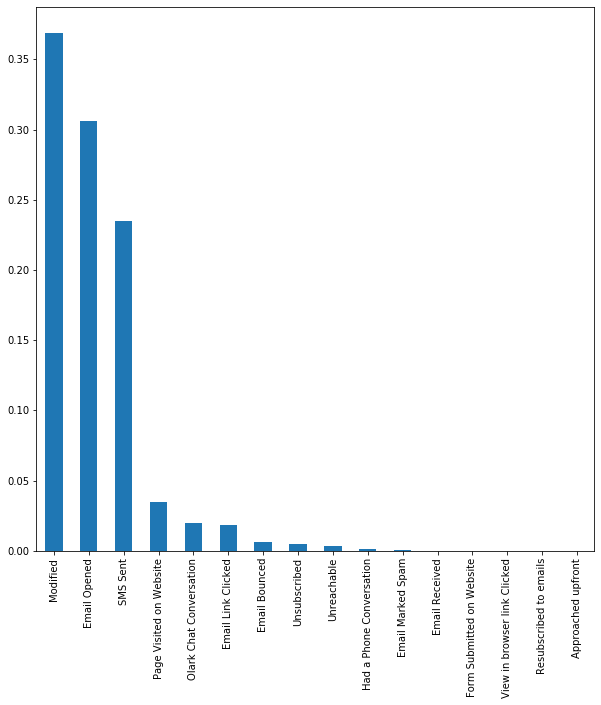

In [215]:
plt.figure(figsize=(10, 10))
lead_score['Last Notable Activity'].value_counts(normalize=True).plot.bar()
plt.show()



In [216]:
def combine_notable(x):
    if x=='Modified' or x=='Email Opened' or x=='SMS Sent':
        return (x)
    else:
        return ('Other Last Notable Activity')

lead_score['Last Notable Activity'] = lead_score['Last Notable Activity'].apply(lambda x: combine_notable(x))

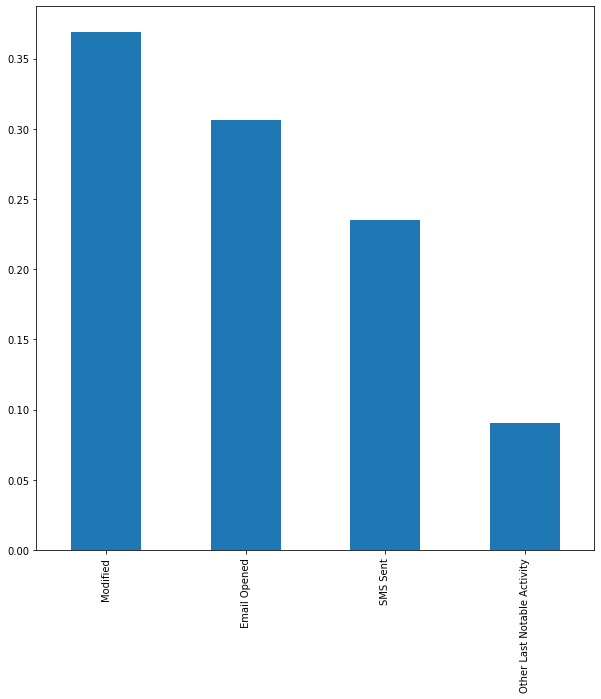

In [217]:
plt.figure(figsize=(10, 10))
lead_score['Last Notable Activity'].value_counts(normalize=True).plot.bar()
plt.show()

#### Remove columns containing only one categorical value

In [218]:
lead_score.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [219]:
lead_score.nunique(axis=0,dropna=True)

Prospect ID                               9240
Lead Number                               9240
Lead Origin                                  3
Lead Source                                  4
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1731
Page Views Per Visit                       114
Last Activity                                3
Specialization                               4
What is your current occupation              2
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
City                                         2
A free copy of Mastering The Interview       2
Last Notable 

#### Visualise variables with 2 unique values

In [220]:
cols_2val = ['Do Not Email','Do Not Call','What is your current occupation','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

In [221]:
len(cols_2val)

10

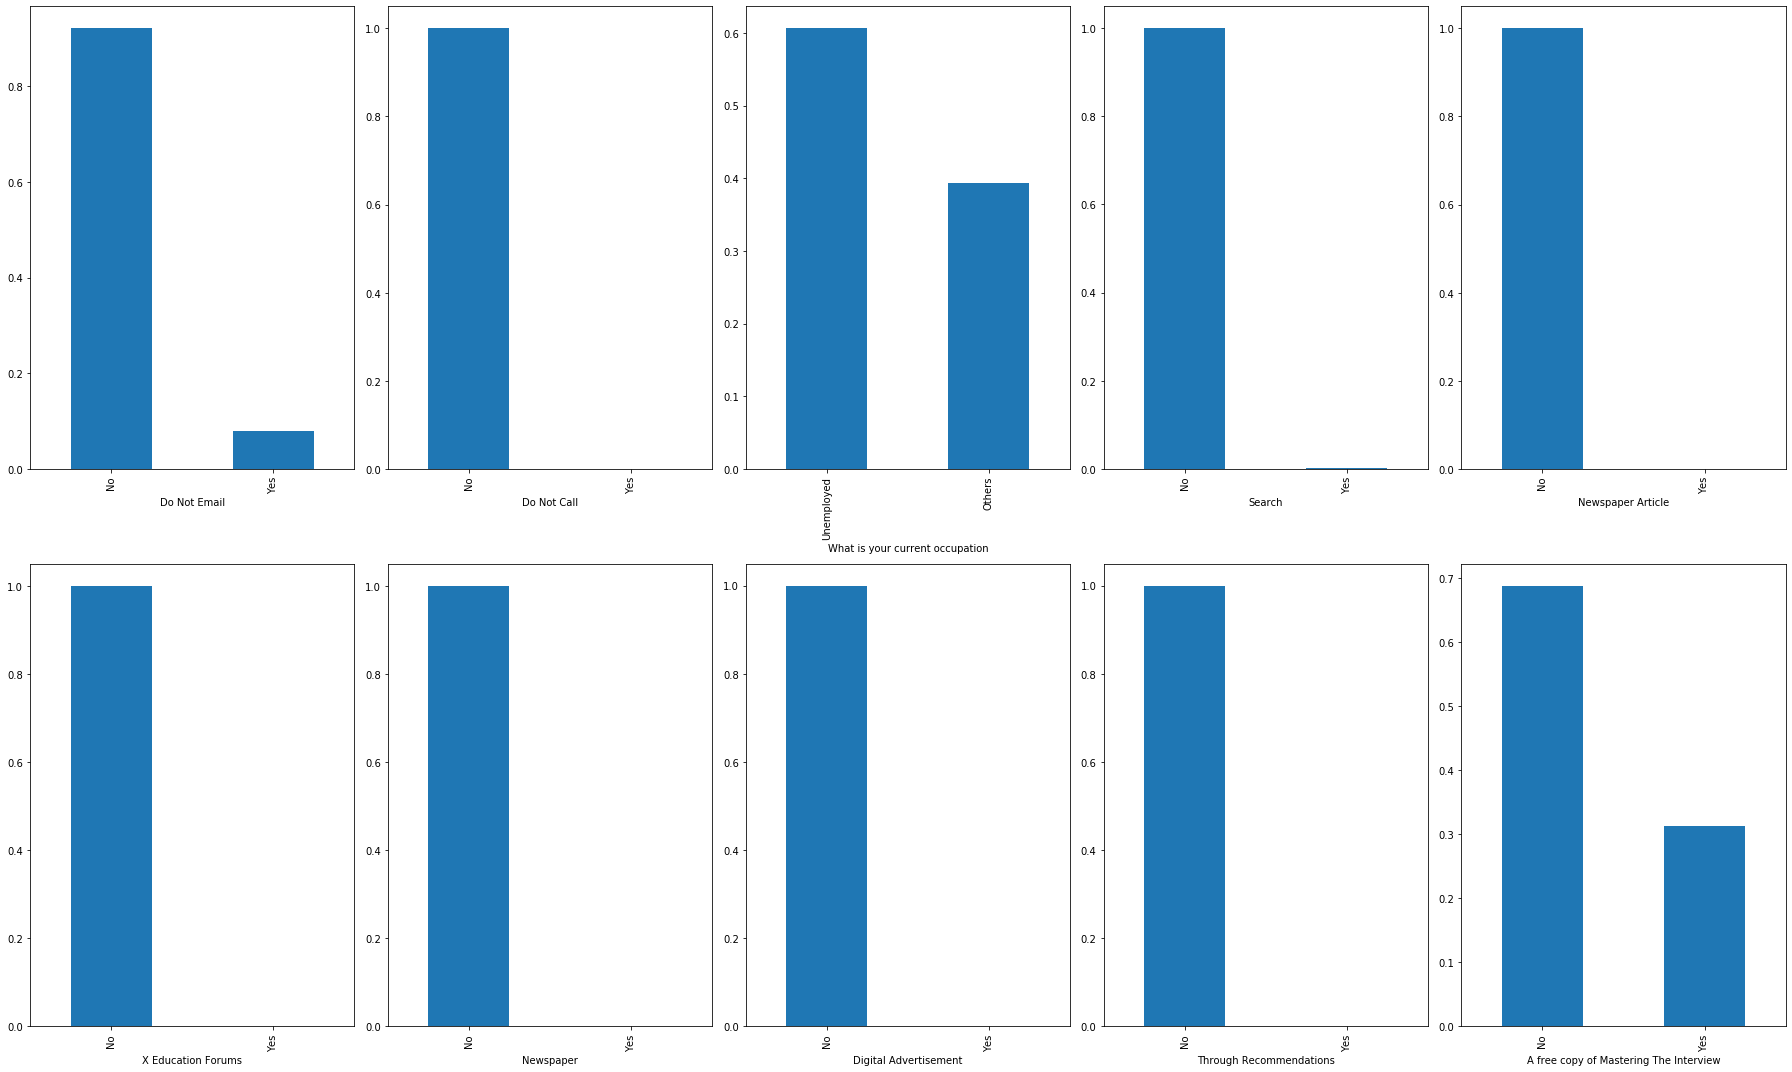

In [222]:
plt.figure(figsize=(25,15))

for i in enumerate(cols_2val):
    plt.subplot(2,5,i[0]+1)
    ax=lead_score[i[1]].value_counts(normalize=True).plot.bar()
    ax.set_xlabel(i[1])
plt.tight_layout()
plt.show()

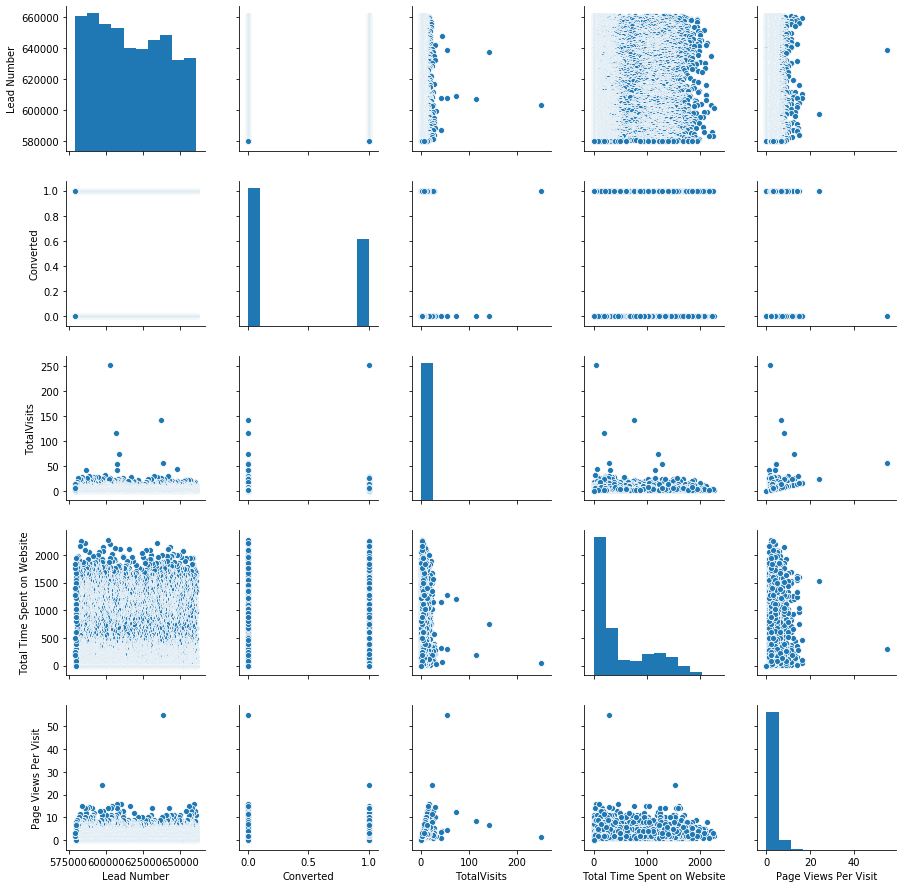

In [223]:
sns.pairplot(lead_score)
plt.show()

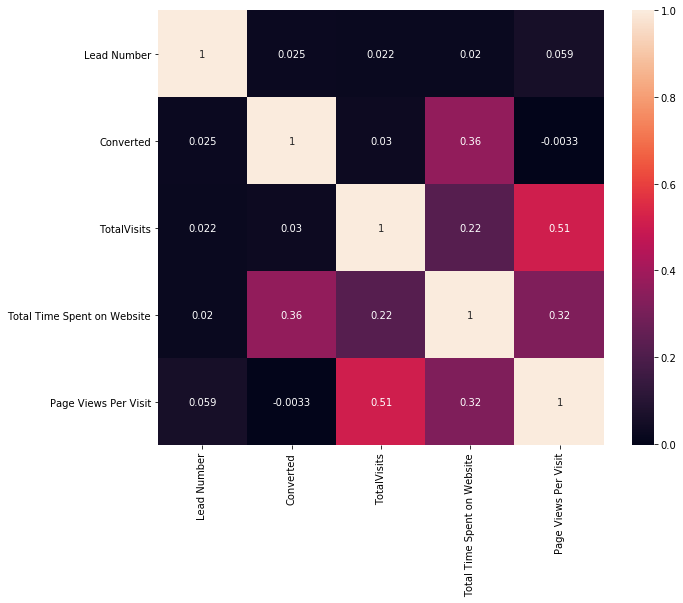

In [224]:
corr = lead_score.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show()

In [225]:
lead_score['Through Recommendations'].value_counts(normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

# Results
Based on the analysis we have seen that many columns are not adding any information to the model, heance we can drop them for further analysis

In [226]:
lead_score.drop(['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)

In [227]:
round(100*(lead_score.isnull().sum()/lead_score.shape[0]),2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [228]:
lead_score = lead_score[~lead_score['TotalVisits'].isnull()]

In [229]:
round(100*(lead_score.isnull().sum()/lead_score.shape[0]),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [230]:
lead_score.shape

(9103, 14)

In [231]:
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,0.380204,3.445238,481.350104,2.362820
std,23337.138926,0.485464,4.854853,545.066142,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596408.000000,0.000000,1.000000,9.000000,1.000000
50%,615278.000000,0.000000,3.000000,244.000000,2.000000
75%,637166.000000,1.000000,5.000000,919.500000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


#### Let's check the lead convertion rate

In [232]:
round(100*(lead_score.groupby('Converted')['Lead Number'].count()/lead_score.shape[0]),2)

Converted
0    61.98
1    38.02
Name: Lead Number, dtype: float64

#### Insight:
Current Lead Convertion Rate is 38%

In [233]:
lead_score.nunique(axis=0,dropna=True)

Prospect ID                               9103
Lead Number                               9103
Lead Origin                                  3
Lead Source                                  4
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1717
Page Views Per Visit                       114
Last Activity                                3
Specialization                               4
What is your current occupation              2
City                                         2
A free copy of Mastering The Interview       2
Last Notable Activity                        4
dtype: int64

#### Let's visualise outliers in the numerical data

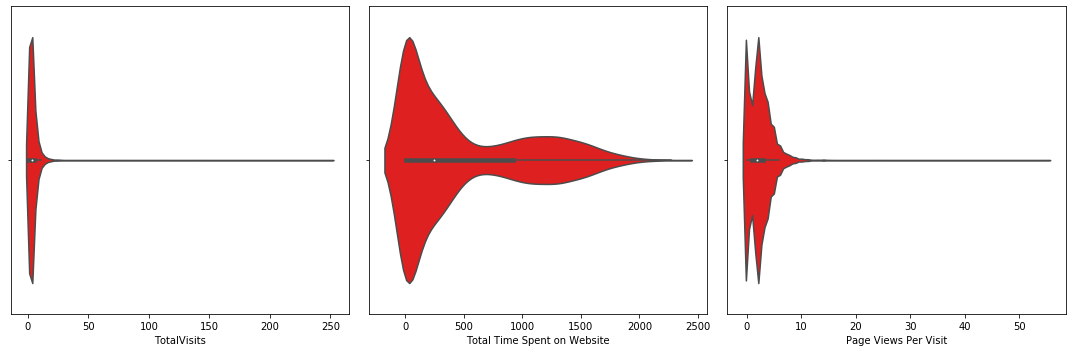

In [234]:
## check box
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.violinplot(x='TotalVisits',data=lead_score, fill='#A4A4A4', color="red")

plt.subplot(1,3,2)
sns.violinplot(x='Total Time Spent on Website',data=lead_score, fill='#A4A4A4', color="red" )

plt.subplot(1,3,3)
sns.violinplot(x='Page Views Per Visit',data=lead_score, fill='#A4A4A4', color="red")

plt.tight_layout()
plt.show()

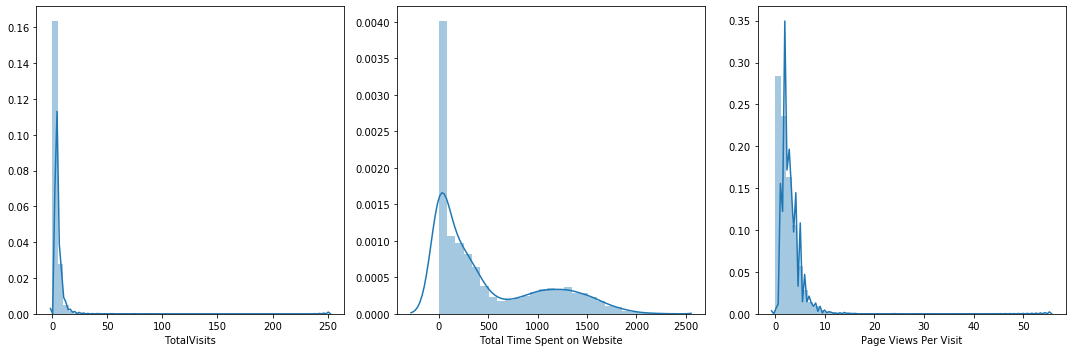

In [235]:
## check the distribution of data

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(lead_score['TotalVisits'])

plt.subplot(1,3,2)
sns.distplot(lead_score['Total Time Spent on Website'])

plt.subplot(1,3,3)
sns.distplot(lead_score['Page Views Per Visit'])

plt.tight_layout()
plt.show()


## Outlier treatment

1. Box Plot Method

If a value is higher than the 1.5*IQR above the upper quartile (Q3), the value will be considered as outlier. Similarly, if a value is lower than the 1.5*IQR below the lower quartile (Q1), the value will be considered as outlier.

QR is interquartile range. It measures dispersion or variation. IQR = Q3 -Q1.
Lower limit of acceptable range = Q1 - 1.5* (Q3-Q1)
Upper limit of acceptable range = Q3 + 1.5* (Q3-Q1)

In [236]:
q3 = lead_score['TotalVisits'].quantile(0.75)
q1 = lead_score['TotalVisits'].quantile(0.25)
IQR = q3-q1

ur = q3+1.5*IQR
lr = q1-1.5*IQR

lead_score['TotalVisits'][lead_score['TotalVisits']>=ur] = ur
lead_score['TotalVisits'][lead_score['TotalVisits']<=lr] = lr


Replacing outliers in total visits with value of upper range and lower range

In [237]:
q3p = lead_score['Page Views Per Visit'].quantile(0.75)
q1p = lead_score['Page Views Per Visit'].quantile(0.25)
IQRp = q3p-q1p

urp = q3p+1.5*IQRp
lrp = q1p-1.5*IQRp

lead_score['Page Views Per Visit'][lead_score['Page Views Per Visit']>=urp] = urp
lead_score['Page Views Per Visit'][lead_score['Page Views Per Visit']<=lrp] = lrp

Replacing outliers in page views per visit with the values of upper range and lower range

In [238]:
q3w = lead_score['Total Time Spent on Website'].quantile(0.75)
q1w = lead_score['Total Time Spent on Website'].quantile(0.25)
IQRw = q3w-q1w

urw = q3w+1.5*IQRw
lrw = q1w-1.5*IQRw

lead_score['Total Time Spent on Website'][lead_score['Total Time Spent on Website']>=urw] = urw
lead_score['Total Time Spent on Website'][lead_score['Total Time Spent on Website']<=lrw] = lrw

Replacing outiers in Total time spent on website with the values of upper range and lower range values

#### Check final value retained in the data set

In [239]:
lead_score.shape

(9103, 14)

### Now the data is ready for train test split

In [240]:
import sklearn
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(lead_score,train_size=0.70,random_state=100)

In [241]:
df_train.shape

(6372, 14)

In [242]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 7962 to 5734
Data columns (total 14 columns):
Prospect ID                               6372 non-null object
Lead Number                               6372 non-null int64
Lead Origin                               6372 non-null object
Lead Source                               6372 non-null object
Converted                                 6372 non-null int64
TotalVisits                               6372 non-null float64
Total Time Spent on Website               6372 non-null int64
Page Views Per Visit                      6372 non-null float64
Last Activity                             6372 non-null object
Specialization                            6372 non-null object
What is your current occupation           6372 non-null object
City                                      6372 non-null object
A free copy of Mastering The Interview    6372 non-null object
Last Notable Activity                     6372 non-null object
dtypes: f

In [243]:
df_train.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
7962,762ac94b-18a8-4fbf-b39e-8f1caf0b8986,588794,Landing Page Submission,Google,0,3.0,1286,1.5,SMS Sent,Other Specialization,Unemployed,Mumbai,No,SMS Sent
5520,ca887e61-3e87-49e8-a198-e188ee7b8ba9,607556,Landing Page Submission,Direct Traffic,0,7.0,60,6.0,Email Opened,Other Specialization,Unemployed,Other City,No,Email Opened
1962,2e78bb85-8eed-46ed-a22f-25300afec646,640629,Landing Page Submission,Google,0,5.0,169,2.5,SMS Sent,Other Specialization,Unemployed,Mumbai,No,Modified
1566,d2028e62-0189-4e3e-8653-a4822d98eb56,643916,Landing Page Submission,Google,1,11.0,1241,3.5,Email Opened,Other Specialization,Others,Mumbai,No,Email Opened
9170,bec6e14f-5df2-4c6a-905a-c0b03175868f,580141,API,Olark Chat,0,0.0,0,0.0,Email Opened,Other Specialization,Unemployed,Other City,No,Email Opened


#### Now let's remove some column like prospect id and lead number

In [244]:
df_train.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [245]:
df_train.shape

(6372, 12)

#### Preprocessing of numerical variabls

In [246]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

df_train[num_vars] = sc.fit_transform(df_train[num_vars])

In [247]:
y_train = df_train.pop('Converted')
X_train = df_train

#### Let's create dummy variables for categorical column

In [248]:
dummy_stat = pd.get_dummies(X_train[['Lead Origin', 'Lead Source','Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)

In [249]:
dummy_stat.head()

,Lead Origin_Landing Page Submission,Lead Origin_Other Origins,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other Source,Last Activity_Other Activity,Last Activity_SMS Sent,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other Specialization,What is your current occupation_Unemployed,City_Other City,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other Last Notable Activity,Last Notable Activity_SMS Sent
7962,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1
5520,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
1962,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0
1566,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
9170,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0


In [250]:
dummy_stat.shape

(6372, 16)

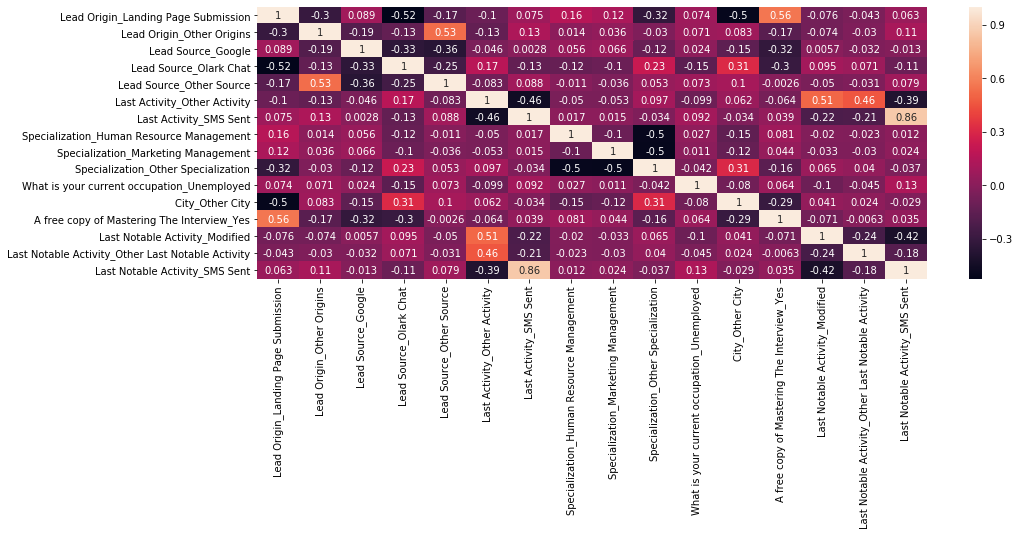

In [251]:
## check corelations among dummy variables
plt.figure(figsize=(15,5))
sns.heatmap(dummy_stat.corr(),annot=True)
plt.show()

#### Last activity as sms sent and last notable activity as sms sent have simillar kind of behaviour hence removing one column

In [252]:
dummy_stat.drop('Last Notable Activity_SMS Sent',axis=1,inplace=True)

In [253]:
## concat our dummy data in the train set

X_train = pd.concat([X_train,dummy_stat],axis=1)

In [254]:
X_train.drop(['Lead Origin', 'Lead Source','Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1,inplace=True)

In [255]:
X_train.shape

(6372, 18)

## Data Processing

In [256]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Other Origins,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other Source,Last Activity_Other Activity,Last Activity_SMS Sent,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other Specialization,What is your current occupation_Unemployed,City_Other City,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other Last Notable Activity
7962,-0.079783,1.476324,-0.423364,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0
5520,1.299804,-0.771066,2.083179,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0
1962,0.610010,-0.571257,0.133646,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0
1566,2.679391,1.393834,0.690655,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
9170,-1.114473,-0.881052,-1.258878,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0


# MANUAL APPROCH FOR MODEL BUILDING

In [257]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm



In [258]:
man_res1 = sm.GLM(y_train,sm.add_constant(X_train),family = sm.families.Binomial()).fit()
man_res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2879.7
Date:                Mon, 07 Sep 2020   Deviance:                       5759.5
Time:                        23:23:56   Pearson chi2:                 6.53e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -0.9911      0.186     -5.341      0.000      -1.355      -0.627
TotalVisits                                           0.3097      0.051      6.131      0.000       0.211       0.409
Total Time Spent on Website                           1.1102      0.039     28.743      0.000       1.035       1.186
Page Views Per Visit                                 -0.2589      0.058     -4.473      0.000      -0.372      -0.145
Lead Origin_Landing Page Submission                  -0.2141      0.109     -1.966      0.049      -0.428      -0.001
Lead Origin_Other Origins                             3.7931      0.220     17.244      0.000       3.362       4.224
Lead Source_Google                                    0.2948      0.108      2.731      0.006       0.083       0.506
Lead Source_Olark Chat                                1.1331      0.154      7.375      0.000       0.832       1.434
Lead Source_Other Source                              0.1578      0.120      1.319      0.187      -0.077       0.392
Last Activity_Other Activity                         -0.5800      0.132     -4.378      0.000      -0.840      -0.320
Last Activity_SMS Sent                                1.1447      0.077     14.953      0.000       0.995       1.295
Specialization_Human Resource Management              0.0327      0.143      0.228      0.820      -0.248       0.314
Specialization_Marketing Management                   0.2854      0.143      1.995      0.046       0.005       0.566
Specialization_Other Specialization                  -0.2256      0.111     -2.029      0.042      -0.444      -0.008
What is your current occupation_Unemployed            0.3147      0.069      4.544      0.000       0.179       0.450
City_Other City                                      -0.1544      0.081     -1.909      0.056      -0.313       0.004
A free copy of Mastering The Interview_Yes           -0.0262      0.100     -0.262      0.793      -0.222       0.169
Last Notable Activity_Modified                       -0.7501      0.100     -7.479      0.000      -0.947      -0.554
Last Notable Activity_Other Last Notable Activity    -0.0864      0.174     -0.496      0.620      -0.428       0.255
=====================================================================================================================
"""

In [259]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_man = pd.DataFrame()
vif_man['Features'] = X_train.columns
vif_man['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_man['VIF'] = round(vif_man['VIF'], 2)
vif_man = vif_man.sort_values(by = "VIF", ascending = False)
vif_man

,Features,VIF
12,Specialization_Other Specialization,6.11
8,Last Activity_Other Activity,4.53
3,Lead Origin_Landing Page Submission,4.30
14,City_Other City,3.52
16,Last Notable Activity_Modified,3.51
2,Page Views Per Visit,3.27
6,Lead Source_Olark Chat,2.85
15,A free copy of Mastering The Interview_Yes,2.75
7,Lead Source_Other Source,2.59
0,TotalVisits,2.56


In [260]:
X_train_man = X_train.drop('Specialization_Human Resource Management',axis=1).copy() ## remove statistically unfit data

In [261]:
man_res2 = sm.GLM(y_train,sm.add_constant(X_train_man),family = sm.families.Binomial()).fit()
man_res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2879.8
Date:                Mon, 07 Sep 2020   Deviance:                       5759.5
Time:                        23:23:56   Pearson chi2:                 6.53e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -0.9758      0.173     -5.642      0.000      -1.315      -0.637
TotalVisits                                           0.3096      0.051      6.131      0.000       0.211       0.409
Total Time Spent on Website                           1.1104      0.039     28.750      0.000       1.035       1.186
Page Views Per Visit                                 -0.2588      0.058     -4.472      0.000      -0.372      -0.145
Lead Origin_Landing Page Submission                  -0.2141      0.109     -1.966      0.049      -0.428      -0.001
Lead Origin_Other Origins                             3.7932      0.220     17.245      0.000       3.362       4.224
Lead Source_Google                                    0.2949      0.108      2.732      0.006       0.083       0.506
Lead Source_Olark Chat                                1.1332      0.154      7.377      0.000       0.832       1.434
Lead Source_Other Source                              0.1580      0.120      1.320      0.187      -0.077       0.392
Last Activity_Other Activity                         -0.5803      0.132     -4.381      0.000      -0.840      -0.321
Last Activity_SMS Sent                                1.1446      0.077     14.952      0.000       0.995       1.295
Specialization_Marketing Management                   0.2700      0.126      2.143      0.032       0.023       0.517
Specialization_Other Specialization                  -0.2412      0.088     -2.751      0.006      -0.413      -0.069
What is your current occupation_Unemployed            0.3147      0.069      4.544      0.000       0.179       0.450
City_Other City                                      -0.1539      0.081     -1.904      0.057      -0.312       0.005
A free copy of Mastering The Interview_Yes           -0.0265      0.100     -0.265      0.791      -0.222       0.169
Last Notable Activity_Modified                       -0.7498      0.100     -7.478      0.000      -0.946      -0.553
Last Notable Activity_Other Last Notable Activity    -0.0866      0.174     -0.497      0.619      -0.428       0.255
=====================================================================================================================
"""

In [262]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_man = pd.DataFrame()
vif_man['Features'] = X_train_man.columns
vif_man['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif_man['VIF'] = round(vif_man['VIF'], 2)
vif_man = vif_man.sort_values(by = "VIF", ascending = False)
vif_man

,Features,VIF
8,Last Activity_Other Activity,4.53
11,Specialization_Other Specialization,4.37
3,Lead Origin_Landing Page Submission,4.02
15,Last Notable Activity_Modified,3.49
13,City_Other City,3.40
2,Page Views Per Visit,3.26
14,A free copy of Mastering The Interview_Yes,2.72
6,Lead Source_Olark Chat,2.69
0,TotalVisits,2.56
7,Lead Source_Other Source,2.53


In [263]:
X_train_man.drop('A free copy of Mastering The Interview_Yes',axis=1,inplace=True)

In [264]:
man_res3 = sm.GLM(y_train,sm.add_constant(X_train_man),family = sm.families.Binomial()).fit()
man_res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2879.8
Date:                Mon, 07 Sep 2020   Deviance:                       5759.6
Time:                        23:23:57   Pearson chi2:                 6.53e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -0.9903      0.164     -6.034      0.000      -1.312      -0.669
TotalVisits                                           0.3083      0.050      6.134      0.000       0.210       0.407
Total Time Spent on Website                           1.1101      0.039     28.759      0.000       1.034       1.186
Page Views Per Visit                                 -0.2582      0.058     -4.464      0.000      -0.371      -0.145
Lead Origin_Landing Page Submission                  -0.2217      0.105     -2.109      0.035      -0.428      -0.016
Lead Origin_Other Origins                             3.7992      0.219     17.361      0.000       3.370       4.228
Lead Source_Google                                    0.3101      0.092      3.389      0.001       0.131       0.489
Lead Source_Olark Chat                                1.1435      0.149      7.689      0.000       0.852       1.435
Lead Source_Other Source                              0.1631      0.118      1.382      0.167      -0.068       0.394
Last Activity_Other Activity                         -0.5797      0.132     -4.377      0.000      -0.839      -0.320
Last Activity_SMS Sent                                1.1448      0.077     14.956      0.000       0.995       1.295
Specialization_Marketing Management                   0.2709      0.126      2.150      0.032       0.024       0.518
Specialization_Other Specialization                  -0.2407      0.088     -2.746      0.006      -0.412      -0.069
What is your current occupation_Unemployed            0.3145      0.069      4.541      0.000       0.179       0.450
City_Other City                                      -0.1520      0.081     -1.888      0.059      -0.310       0.006
Last Notable Activity_Modified                       -0.7497      0.100     -7.477      0.000      -0.946      -0.553
Last Notable Activity_Other Last Notable Activity    -0.0867      0.174     -0.498      0.619      -0.428       0.255
=====================================================================================================================
"""

In [265]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_man = pd.DataFrame()
vif_man['Features'] = X_train_man.columns
vif_man['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif_man['VIF'] = round(vif_man['VIF'], 2)
vif_man = vif_man.sort_values(by = "VIF", ascending = False)
vif_man

,Features,VIF
8,Last Activity_Other Activity,4.53
11,Specialization_Other Specialization,4.31
14,Last Notable Activity_Modified,3.49
13,City_Other City,3.39
2,Page Views Per Visit,3.26
3,Lead Origin_Landing Page Submission,2.67
6,Lead Source_Olark Chat,2.66
0,TotalVisits,2.53
7,Lead Source_Other Source,2.53
12,What is your current occupation_Unemployed,2.45


In [266]:
X_train_man.drop('Last Notable Activity_Other Last Notable Activity',axis=1,inplace=True)

In [267]:
man_res4 = sm.GLM(y_train,sm.add_constant(X_train_man),family = sm.families.Binomial()).fit()
man_res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2879.9
Date:                Mon, 07 Sep 2020   Deviance:                       5759.8
Time:                        23:23:57   Pearson chi2:                 6.53e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9948      0.164     -6.070      0.000      -1.316      -0.674
TotalVisits                                    0.3047      0.050      6.130      0.000       0.207       0.402
Total Time Spent on Website                    1.1100      0.039     28.756      0.000       1.034       1.186
Page Views Per Visit                          -0.2565      0.058     -4.445      0.000      -0.370      -0.143
Lead Origin_Landing Page Submission           -0.2216      0.105     -2.108      0.035      -0.428      -0.016
Lead Origin_Other Origins                      3.7898      0.218     17.388      0.000       3.363       4.217
Lead Source_Google                             0.3098      0.092      3.385      0.001       0.130       0.489
Lead Source_Olark Chat                         1.1420      0.149      7.681      0.000       0.851       1.433
Lead Source_Other Source                       0.1650      0.118      1.399      0.162      -0.066       0.396
Last Activity_Other Activity                  -0.6261      0.094     -6.656      0.000      -0.811      -0.442
Last Activity_SMS Sent                         1.1429      0.076     14.959      0.000       0.993       1.293
Specialization_Marketing Management            0.2721      0.126      2.161      0.031       0.025       0.519
Specialization_Other Specialization           -0.2409      0.088     -2.749      0.006      -0.413      -0.069
What is your current occupation_Unemployed     0.3164      0.069      4.578      0.000       0.181       0.452
City_Other City                               -0.1526      0.080     -1.896      0.058      -0.310       0.005
Last Notable Activity_Modified                -0.7212      0.082     -8.784      0.000      -0.882      -0.560
==============================================================================================================
"""

In [268]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_man = pd.DataFrame()
vif_man['Features'] = X_train_man.columns
vif_man['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif_man['VIF'] = round(vif_man['VIF'], 2)
vif_man = vif_man.sort_values(by = "VIF", ascending = False)
vif_man

,Features,VIF
11,Specialization_Other Specialization,4.31
13,City_Other City,3.39
2,Page Views Per Visit,3.25
3,Lead Origin_Landing Page Submission,2.66
6,Lead Source_Olark Chat,2.65
7,Lead Source_Other Source,2.53
0,TotalVisits,2.47
8,Last Activity_Other Activity,2.45
12,What is your current occupation_Unemployed,2.45
4,Lead Origin_Other Origins,2.23


In [269]:
X_train_man.drop('Lead Source_Other Source',axis=1,inplace=True)

In [270]:
man_res5 = sm.GLM(y_train,sm.add_constant(X_train_man),family = sm.families.Binomial()).fit()
man_res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2880.9
Date:                Mon, 07 Sep 2020   Deviance:                       5761.8
Time:                        23:23:57   Pearson chi2:                 6.53e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9179      0.154     -5.951      0.000      -1.220      -0.616
TotalVisits                                    0.3123      0.049      6.322      0.000       0.215       0.409
Total Time Spent on Website                    1.1095      0.039     28.743      0.000       1.034       1.185
Page Views Per Visit                          -0.2404      0.057     -4.254      0.000      -0.351      -0.130
Lead Origin_Landing Page Submission           -0.2677      0.100     -2.680      0.007      -0.463      -0.072
Lead Origin_Other Origins                      3.8962      0.205     19.043      0.000       3.495       4.297
Lead Source_Google                             0.2453      0.079      3.108      0.002       0.091       0.400
Lead Source_Olark Chat                         1.0801      0.142      7.617      0.000       0.802       1.358
Last Activity_Other Activity                  -0.6271      0.094     -6.666      0.000      -0.811      -0.443
Last Activity_SMS Sent                         1.1423      0.076     14.956      0.000       0.993       1.292
Specialization_Marketing Management            0.2686      0.126      2.134      0.033       0.022       0.515
Specialization_Other Specialization           -0.2358      0.088     -2.694      0.007      -0.407      -0.064
What is your current occupation_Unemployed     0.3165      0.069      4.578      0.000       0.181       0.452
City_Other City                               -0.1462      0.080     -1.821      0.069      -0.304       0.011
Last Notable Activity_Modified                -0.7173      0.082     -8.741      0.000      -0.878      -0.556
==============================================================================================================
"""

In [271]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_man = pd.DataFrame()
vif_man['Features'] = X_train_man.columns
vif_man['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif_man['VIF'] = round(vif_man['VIF'], 2)
vif_man = vif_man.sort_values(by = "VIF", ascending = False)
vif_man

,Features,VIF
10,Specialization_Other Specialization,4.12
12,City_Other City,3.22
2,Page Views Per Visit,3.12
3,Lead Origin_Landing Page Submission,2.62
6,Lead Source_Olark Chat,2.57
7,Last Activity_Other Activity,2.44
0,TotalVisits,2.43
11,What is your current occupation_Unemployed,2.42
13,Last Notable Activity_Modified,2.15
8,Last Activity_SMS Sent,1.79


In [272]:
X_train_man.drop('City_Other City',axis=1,inplace=True)

In [273]:
man_res6 = sm.GLM(y_train,sm.add_constant(X_train_man),family = sm.families.Binomial()).fit()
man_res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2882.5
Date:                Mon, 07 Sep 2020   Deviance:                       5765.1
Time:                        23:23:57   Pearson chi2:                 6.54e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.0446      0.138     -7.582      0.000      -1.315      -0.775
TotalVisits                                    0.3177      0.049      6.452      0.000       0.221       0.414
Total Time Spent on Website                    1.1083      0.039     28.739      0.000       1.033       1.184
Page Views Per Visit                          -0.2399      0.056     -4.247      0.000      -0.351      -0.129
Lead Origin_Landing Page Submission           -0.2031      0.093     -2.179      0.029      -0.386      -0.020
Lead Origin_Other Origins                      3.9280      0.204     19.254      0.000       3.528       4.328
Lead Source_Google                             0.2635      0.078      3.366      0.001       0.110       0.417
Lead Source_Olark Chat                         1.0904      0.142      7.699      0.000       0.813       1.368
Last Activity_Other Activity                  -0.6265      0.094     -6.662      0.000      -0.811      -0.442
Last Activity_SMS Sent                         1.1420      0.076     14.957      0.000       0.992       1.292
Specialization_Marketing Management            0.2639      0.126      2.098      0.036       0.017       0.510
Specialization_Other Specialization           -0.2580      0.087     -2.975      0.003      -0.428      -0.088
What is your current occupation_Unemployed     0.3202      0.069      4.637      0.000       0.185       0.456
Last Notable Activity_Modified                -0.7137      0.082     -8.704      0.000      -0.874      -0.553
==============================================================================================================
"""

In [274]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_man = pd.DataFrame()
vif_man['Features'] = X_train_man.columns
vif_man['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif_man['VIF'] = round(vif_man['VIF'], 2)
vif_man = vif_man.sort_values(by = "VIF", ascending = False)
vif_man

,Features,VIF
10,Specialization_Other Specialization,3.26
2,Page Views Per Visit,3.12
3,Lead Origin_Landing Page Submission,2.60
6,Lead Source_Olark Chat,2.45
0,TotalVisits,2.43
7,Last Activity_Other Activity,2.42
11,What is your current occupation_Unemployed,2.39
12,Last Notable Activity_Modified,2.15
8,Last Activity_SMS Sent,1.77
4,Lead Origin_Other Origins,1.58


In [275]:
man_converted_prob = man_res6.predict(sm.add_constant(X_train_man))

In [276]:
man_converted_prob[:10]

7962    0.873525
5520    0.106504
1962    0.275856
1566    0.728723
9170    0.284856
5097    0.224312
8954    0.493692
309     0.336152
5519    0.475350
1050    0.553254
dtype: float64

In [277]:
man_pred = pd.DataFrame({'Converted':y_train,'Converted_man_prob':man_converted_prob})

In [278]:
man_pred.head()

,Converted,Converted_man_prob
7962,0,0.873525
5520,0,0.106504
1962,0,0.275856
1566,1,0.728723
9170,0,0.284856


In [279]:
man_pred['man_Converted_pred'] = man_pred['Converted_man_prob'].apply(lambda x:1 if x>0.355 else 0)

In [280]:
import sklearn
metrics.accuracy_score(man_pred.Converted, man_pred.man_Converted_pred)

0.7940991839296924

In [281]:
confusion_man = metrics.confusion_matrix(man_pred.Converted, man_pred.man_Converted_pred)
confusion_man

array([[3160,  793],
       [ 519, 1900]], dtype=int64)

In [282]:
TP = confusion_man[1,1] # true positive 
TN = confusion_man[0,0] # true negatives
FP = confusion_man[0,1] # false positives
FN = confusion_man[1,0] # false negatives

In [283]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7854485324514262

In [284]:
# Let us calculate specificity
TN / float(TN+FP)

0.7993928661775866

In [285]:
# Calculate false postive rate - predicting converted lead when customer does not converted
print(FP/ float(TN+FP))

0.20060713382241335


In [286]:

print (TP / float(TP+FP))# Positive predictive value

0.7055328629780914


In [287]:

print (TN / float(TN+ FN))# Negative predictive value

0.8589290568089155


## RFE

In [288]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [289]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg,9)
rfe = rfe.fit(X_train,y_train)

In [290]:
cols = X_train.columns[rfe.support_]

In [291]:
import statsmodels.api as sm

logm = sm.GLM(y_train,sm.add_constant(X_train[cols]) , family = sm.families.Binomial()).fit()
logm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6362
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2909.9
Date:                Mon, 07 Sep 2020   Deviance:                       5819.7
Time:                        23:24:00   Pearson chi2:                 6.53e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.3634      0.083    -16.513      0.000      -1.525      -1.202
Total Time Spent on Website                    1.1207      0.038     29.223      0.000       1.046       1.196
Lead Origin_Other Origins                      4.0425      0.177     22.815      0.000       3.695       4.390
Lead Source_Google                             0.3002      0.075      3.987      0.000       0.153       0.448
Lead Source_Olark Chat                         1.1514      0.103     11.214      0.000       0.950       1.353
Last Activity_Other Activity                  -0.5569      0.093     -5.998      0.000      -0.739      -0.375
Last Activity_SMS Sent                         1.0992      0.076     14.530      0.000       0.951       1.248
Specialization_Marketing Management            0.4076      0.109      3.742      0.000       0.194       0.621
What is your current occupation_Unemployed     0.3238      0.069      4.717      0.000       0.189       0.458
Last Notable Activity_Modified                -0.7735      0.081     -9.546      0.000      -0.932      -0.615
==============================================================================================================
"""

In [292]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [293]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Last Activity_Other Activity,2.21
8,Last Notable Activity_Modified,2.06
7,What is your current occupation_Unemployed,1.87
5,Last Activity_SMS Sent,1.53
2,Lead Source_Google,1.47
3,Lead Source_Olark Chat,1.45
0,Total Time Spent on Website,1.28
1,Lead Origin_Other Origins,1.22
6,Specialization_Marketing Management,1.10


#### Let's predict lead score 

In [294]:
y_train_prob = logm.predict(sm.add_constant(X_train[cols]))

In [295]:
y_train_prob[:10]

7962    0.882294
5520    0.129679
1962    0.258458
1566    0.622191
9170    0.294074
5097    0.231569
8954    0.466856
309     0.314538
5519    0.474962
1050    0.624895
dtype: float64

#### Let's find optimal cutoff

In [296]:
lead_prob = pd.DataFrame({'Converted':y_train,'Converted_prob':y_train_prob})
lead_prob.head()

,Converted,Converted_prob
7962,0,0.882294
5520,0,0.129679
1962,0,0.258458
1566,1,0.622191
9170,0,0.294074


In [297]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    lead_prob[i]= lead_prob.Converted_prob.map(lambda x: 1 if x > i else 0)
lead_prob.head()

,Converted,Converted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7962,0,0.882294,1,1,1,1,1,1,1,1,1,0
5520,0,0.129679,1,1,0,0,0,0,0,0,0,0
1962,0,0.258458,1,1,1,0,0,0,0,0,0,0
1566,1,0.622191,1,1,1,1,1,1,1,0,0,0
9170,0,0.294074,1,1,1,0,0,0,0,0,0,0


In [298]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(lead_prob.Converted, lead_prob[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.569052  0.968169  0.324817
0.2   0.2  0.712492  0.909053  0.592208
0.3   0.3  0.779504  0.820174  0.754617
0.4   0.4  0.794727  0.744523  0.825449
0.5   0.5  0.792687  0.657710  0.875285
0.6   0.6  0.775267  0.547747  0.914495
0.7   0.7  0.755650  0.455147  0.939540
0.8   0.8  0.723635  0.331955  0.963319
0.9   0.9  0.673886  0.161637  0.987351


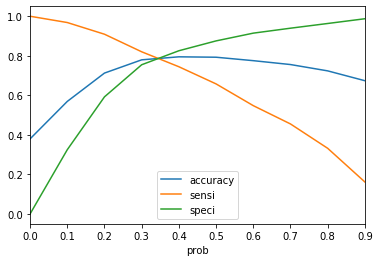

In [299]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [300]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [301]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve( lead_prob.Converted, lead_prob.Converted_prob, drop_intermediate = False )

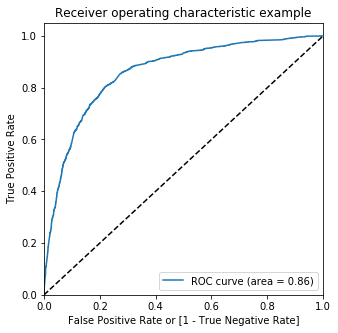

In [302]:
draw_roc(lead_prob.Converted, lead_prob.Converted_prob)

In [303]:
## chose optimal cutoff as 0.35

lead_prob['Converted_pred'] = lead_prob['Converted_prob'].apply(lambda x: 1 if x>0.355 else 0)

In [304]:
lead_prob.head()

,Converted,Converted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Converted_pred
7962,0,0.882294,1,1,1,1,1,1,1,1,1,0,1
5520,0,0.129679,1,1,0,0,0,0,0,0,0,0,0
1962,0,0.258458,1,1,1,0,0,0,0,0,0,0,0
1566,1,0.622191,1,1,1,1,1,1,1,0,0,0,1
9170,0,0.294074,1,1,1,0,0,0,0,0,0,0,0


In [305]:
## accuracy 

metrics.accuracy_score(lead_prob.Converted, lead_prob.Converted_pred)

0.7909604519774012

In [306]:
confusion2 = metrics.confusion_matrix(lead_prob.Converted, lead_prob.Converted_pred)
confusion2

array([[3147,  806],
       [ 526, 1893]], dtype=int64)

In [307]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [308]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7825547747002893

In [309]:
# Let us calculate specificity
TN / float(TN+FP)

0.7961042246395142

In [310]:
# Calculate false postive rate - predicting converted lead when customer does not converted
print(FP/ float(TN+FP))

0.2038957753604857


In [311]:
print (TP / float(TP+FP))# Positive predictive value 


0.7013708781030011


In [312]:
print (TN / float(TN+ FN))# Negative predictive value


0.8567928124149197


#### Let's check for test set

In [313]:
df_test.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
3504,7f5e4c3e-3786-435f-aae4-7590cc6d6331,626930,Landing Page Submission,Other Source,0,3.0,424,3.00,Email Opened,Other Specialization,Unemployed,Mumbai,Yes,Email Opened
4050,01d6d18a-39e3-48de-9e93-2ec63b2ace60,621198,Other Origins,Other Source,1,0.0,0,0.00,SMS Sent,Other Specialization,Unemployed,Other City,No,SMS Sent
7201,bb8e9fc5-3f58-4fef-8483-10ad1d489490,594161,Landing Page Submission,Direct Traffic,0,2.0,712,2.00,SMS Sent,Other Specialization,Unemployed,Mumbai,Yes,SMS Sent
1196,1bb09094-386f-49ac-ae86-ccf5fa89eaf8,647285,Landing Page Submission,Other Source,0,4.0,423,4.00,Email Opened,Other Specialization,Unemployed,Other City,Yes,Email Opened
8219,4f8f7d9f-423c-43ed-8190-10e6ef00d03f,587146,Landing Page Submission,Direct Traffic,1,7.0,247,1.75,Other Activity,Finance Management,Unemployed,Other City,Yes,Other Last Notable Activity


In [314]:
df_test[num_vars] = sc.fit_transform(df_test[num_vars])

In [315]:
dummy_test = pd.get_dummies(df_test[['Lead Origin', 'Lead Source','Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)

In [316]:
df_test = pd.concat([df_test,dummy_test],axis=1)

In [317]:
df_test.shape

(2731, 30)

In [318]:
df_test['lead_score']  = logm.predict(sm.add_constant(df_test[cols]))

In [319]:
df_test.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other Specialization,What is your current occupation_Unemployed,City_Other City,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other Last Notable Activity,Last Notable Activity_SMS Sent,lead_score
3504,7f5e4c3e-3786-435f-aae4-7590cc6d6331,626930,Landing Page Submission,Other Source,0,-0.068989,-0.108519,0.416452,Email Opened,Other Specialization,...,0,0,1,1,0,1,0,0,0,0.238438
4050,01d6d18a-39e3-48de-9e93-2ec63b2ace60,621198,Other Origins,Other Source,1,-1.125494,-0.888077,-1.263530,SMS Sent,Other Specialization,...,0,0,1,1,1,0,0,0,1,0.957173
7201,bb8e9fc5-3f58-4fef-8483-10ad1d489490,594161,Landing Page Submission,Direct Traffic,0,-0.421158,0.420993,-0.143542,SMS Sent,Other Specialization,...,0,0,1,1,0,1,0,0,1,0.629812
1196,1bb09094-386f-49ac-ae86-ccf5fa89eaf8,647285,Landing Page Submission,Other Source,0,0.283179,-0.110357,0.976446,Email Opened,Other Specialization,...,0,0,1,1,1,1,0,0,0,0.238064
8219,4f8f7d9f-423c-43ed-8190-10e6ef00d03f,587146,Landing Page Submission,Direct Traffic,1,1.339684,-0.433947,-0.283540,Other Activity,Finance Management,...,0,0,0,1,1,1,0,1,0,0.110775


In [320]:
df_test = df_test[['Lead Number','Converted','lead_score']]

In [321]:
df_test.head()

,Lead Number,Converted,lead_score
3504,626930,0,0.238438
4050,621198,1,0.957173
7201,594161,0,0.629812
1196,647285,0,0.238064
8219,587146,1,0.110775


In [322]:
df_test['Converted_pred'] = df_test['lead_score'].apply(lambda x:1 if x>0.355 else 0)

In [323]:
## accuracy 

metrics.accuracy_score(df_test.Converted, df_test.Converted_pred)

0.7905529110216039

In [324]:
confusion2 = metrics.confusion_matrix(lead_prob.Converted, lead_prob.Converted_pred)
confusion2

array([[3147,  806],
       [ 526, 1893]], dtype=int64)

In [325]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [326]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7825547747002893

In [327]:
# Let us calculate specificity
TN / float(TN+FP)

0.7961042246395142

In [328]:
# Calculate false postive rate - predicting converted lead when customer does not converted
print(FP/ float(TN+FP))

0.2038957753604857


In [329]:
print (TP / float(TP+FP))# Positive predictive value 

0.7013708781030011


In [330]:
print (TN / float(TN+ FN))# Negative predictive value

0.8567928124149197


#### Converted lead score

In [331]:
df_test['lead_score'] = round(df_test['lead_score']*100)

In [332]:
df_test.head()

,Lead Number,Converted,lead_score,Converted_pred
3504,626930,0,24.0,0
4050,621198,1,96.0,1
7201,594161,0,63.0,1
1196,647285,0,24.0,0
8219,587146,1,11.0,0


In [333]:
lead_score

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.00,Other Activity,Other Specialization,Unemployed,Other City,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Other Source,0,5.0,674,2.50,Email Opened,Other Specialization,Unemployed,Other City,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Other Specialization,Others,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Other Activity,Other Specialization,Unemployed,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.00,Other Activity,Other Specialization,Unemployed,Mumbai,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,0,0.0,0,0.00,Other Activity,Other Specialization,Others,Other City,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,1,2.0,1640,2.00,Email Opened,Other Specialization,Unemployed,Mumbai,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,0,0.0,0,0.00,Other Activity,Other Specialization,Others,Other City,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,0,2.0,71,2.00,Email Opened,Other Specialization,Others,Other City,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,0,4.0,58,4.00,Email Opened,Finance Management,Others,Mumbai,No,Email Opened
